The best small project to start with on a new tool is the classification of iris
flowers. This is a good dataset for your first project because it is so well understood.
- Attributes are numeric so you do not have to figure out how to load and handle data.
- It is a classification problem, allowing you to practice with an easier type of supervised
learning algorithm.
- It is a multiclass classification problem (multi-nominal) that may require some specialized
handling.
- It only has 4 attributes and 150 rows, meaning it is small and easily fits into memory (and
a screen or single sheet of paper).
- All of the numeric attributes are in the same units and the same scale not requiring any
special scaling or transforms to get started.

In this tutorial we are going to work through a small machine learning project end-to-end.
Here is an overview of what we are going to cover:
1. Loading the dataset.
2. Summarizing the dataset.
3. Visualizing the dataset.
4. Evaluating some algorithms.
5. Making some predictions.

In [1]:
# Load the lobraries
# test
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
# Load dataset
file_path = '../data/iris.data'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(file_path, names=names)

### Summarize the Dataset

In [ ]:
#shape
dataset.shape

(150, 5)

In [ ]:
# view data
dataset.sample(3)

,sepal-length,sepal-width,petal-length,petal-width,class
9,4.9,3.1,1.5,0.1,Iris-setosa
77,6.7,3.0,5.0,1.7,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor


In [ ]:
# statistical Summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal-length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal-width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal-length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal-width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [ ]:
dataset.describe(include=np.object).T

,count,unique,top,freq
class,150,3,Iris-setosa,50


In [ ]:
# class distribution
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### Data Visualization

We need to extend this with some visualizations.Two types of plots are standard for this:

- Univariate plots to better understand each attribute.
- Multivariate plots to better understand the relationships between attributes.

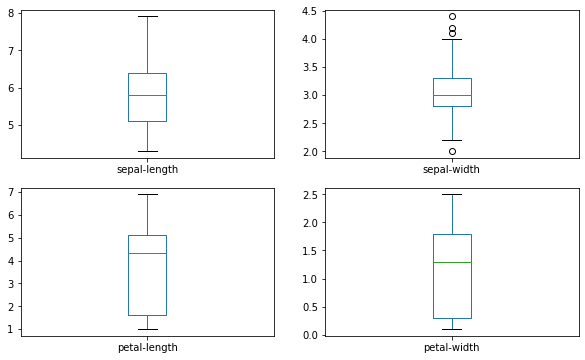

In [ ]:
# look into boxplot for stats
figsize = (10,6)
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize= figsize);

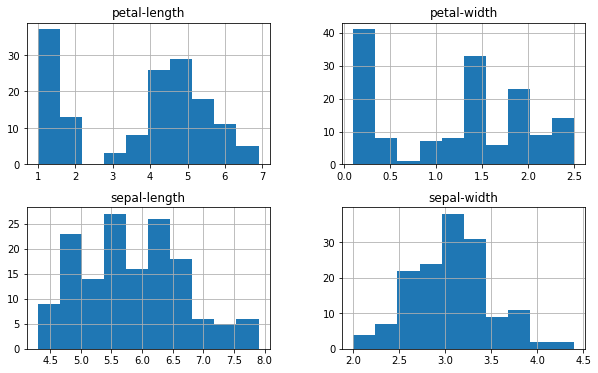

In [ ]:
# look into distribution shape
dataset.hist(figsize=figsize);

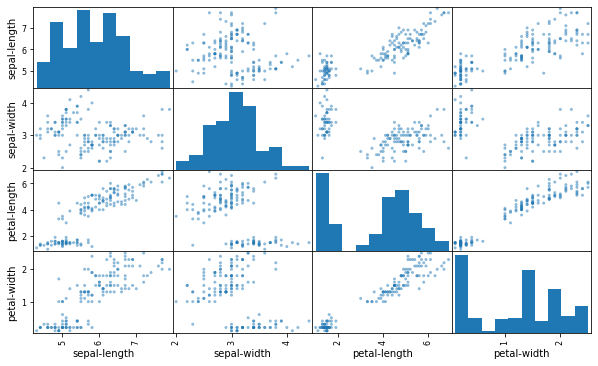

In [ ]:
# Multivariate plots for interactions between variables
scatter_matrix(dataset, figsize=figsize);

## Evaluate Some Algorithms
Now it is time to create some models of the data and estimate their accuracy on unseen data.
Here is what we are going to cover in this step:
1. Separate out a validation dataset.
2. Setup the test harness to use 10-fold cross-validation.
3. Build 5 different models to predict species from flower measurements
4. Select the best model.

### Validation set split

In [ ]:
array = dataset.values
X = array[:, 0:4]
y = array[:, 4]
validation_size = 0.2
seed = 7
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

We now have train pair of data for preparing the model and a validation pair of data to use later.

### Test Harness

We will use 10-fold cross-validation to estimate accuracy on unseen data. This will split our
dataset into 10 parts, e.g. the model will train on 9 and test on 1 and repeat for all combinations
of train-test splits. We are using the metric of accuracy to evaluate models. This is a proportion
of the number of correctly predicted instances divided by the total number of instances in the
dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring
variable when we run build and evaluate each model next.

### Build Models

We don't know which algorithms would be good on this problem or what configurations to use.
We got an idea from the plots that some of the classes are partially linearly separable in some
dimensions, so we are expecting generally good results. Let's evaluate six different algorithms:
- Logistic Regression (LR).
- Linear Discriminant Analysis (LDA).
- k-Nearest Neighbors (KNN).
- Classification and Regression Trees (CART).
- Gaussian Naive Bayes (NB).
- Support Vector Machines (SVM).

This list is a good mixture of simple linear (LR and LDA), and nonlinear (KNN, CART,
NB and SVM) algorithms. We reset the random number seed before each run to ensure that
the evaluation of each algorithm is performed using exactly the same data splits. It ensures the
results are directly comparable.

In [ ]:
# Spot-check algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(estimator=model, X= X_train,y= y_train,cv = kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = f"{name} {cv_results.mean()} +/- ({cv_results.std()})"
    print(msg)

LR 0.9666666666666666 +/- (0.04082482904638632)
LDA 0.975 +/- (0.03818813079129868)
KNN 0.9833333333333332 +/- (0.03333333333333335)
CART 0.975 +/- (0.03818813079129868)
NB 0.975 +/- (0.053359368645273735)
SVM 0.9916666666666666 +/- (0.025000000000000012)


We can also
create a plot of the model evaluation results and compare the spread and the mean accuracy
of each model. There is a population of accuracy measures for each algorithm because each
algorithm was evaluated 10 times (10 fold cross-validation).

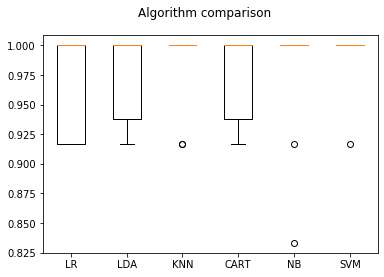

In [ ]:
# Compare Algorithms
#pd.DataFrame(results).T.rename(columns= {num: name for num, name in zip(range(6), names)}).plot(kind = 'box')
fig1 = pyplot.figure()
fig1.suptitle('Algorithm comparison')
ax = fig1.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


### Make Predictions

The SVM algorithm was the most accurate model that we tested. Now we want to get an idea
of the accuracy of the model on our validation dataset. This will give us an independent final
check on the accuracy of the best model. It is important to keep a validation set just in case
you made a slip during training, such as overfitting to the training set or a data leak. Both
will result in an overly optimistic result. We can run the SVM model directly on the validation
set and summarize the results as a final accuracy score, a confusion matrix and a classification
report


In [ ]:
# Make predictions on validation dataset
model = KNeighborsClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_validation)
print(accuracy_score(y_true=y_validation, y_pred=predictions))
print(confusion_matrix(y_true=y_validation, y_pred=predictions))
print(classification_report(y_true=y_validation, y_pred=predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

